In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

# 머신러닝 심화반 실습 예제 - 선형 회귀(Linear Regression)

가장 간단한 머신러닝 알고리즘 중 하나인 Linear Regression을 활용하여 섭씨온도(Celsius, C)를 화씨온도(Fahrenheit, F)로 변환해주는 공식을 만들겠습니다.

우리는 섭씨온도와 화씨온도가 다음과 같은 선형(linear)관계를 가지고 있음을 잘 알고 있습니다. 

<br>
<center>$$F = C * 1.8 + 32$$</center>


하지만, 1.8과 32라는 값을 모르고 있다고 가정한 뒤, 머신러닝 알고리즘을 이용하여 주어진 섭씨온도와 화씨온도 데이터만으로 이 값들을 찾아보는 실습을 해보겠습니다. 

### Prerequisites

먼저 이번 실습예제에서 사용할 패키지들을 가져오겠습니다. 오늘 필요한 파이썬 패키지는 벡터와 행렬 연산을 하는데 도움이 되는 패키지 넘파이(Numpy)와, 파이썬에서 데이터를 분석하는데 도움을 주는 패키지 판다스(pandas), 머신러닝 알고리즘의 학습결과를 시각화하기 위한 데이터 시각화 패키지 matplotlib 을 불러옵니다.

In [2]:
# 주피터 노트북에서 그림을 바로 띄워주도록 합니다. 
%matplotlib inline
# 실습을 위해 필요한 패키지를 불러옵니다. 
# 수학연산에 필요한 numpy, 데이터를 분석하는데 도움을 주는 패키지 pandas, 
# 학습결과를 그래프로 그려주는 matplotlib의 pyplot 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate Dataset

이제 선형회귀(Linear Regreesion) 문제에서 학습용으로 사용할 데이터셋을 만들어보겠습니다.

0도에서 100도 사이의 값을 갖는 섭씨온도 데이터를 100개 만들어주겠습니다.

이 데이터가 머신러닝 알고리즘에서 사실상 Feature가 될 것입니다.

In [3]:
# 임의의 100개의 섭씨온도 데이터를 가지고 있는 데이터셋을 만들어봅시다. 
# numpy의 random이라는 서브패키지의 randint으로 0부터 100사이의 임의의 정수 100개를 생성합니다.
# np.random.randint()은 최소값(low), 최대값(high), 개수(size)를 입력받습니다.
# np.random.randint()은 최소값과 최대값 사이에서 지정한 개수만큼 랜덤하게 정수를 추출해줍니다.
# 생성한 100개의 배열을 C라는 변수에 담습니다. 
C = np.random.randint(low=0, high=100, size=100)

# 섭씨온도 데이터를 담고있는 C의 shape를 확인합니다. (100,)로 100개의 데이터가 있습니다.
print(C.shape)

# C의 첫 10개 값을 확인합니다. 
C[:10]

(100,)


array([76, 54, 94, 76, 55, 98, 20, 21, 28,  4])

그리고, 우리가 알고 있었던 기존의 섭씨-화씨변환 공식을 이용하여 위 섭씨온도 데이터에 대응하는 화씨온도 데이터를 생성합니다. 

이 데이터가 마찬가지로 오늘 다룰 머신러닝 알고리즘의 Label이 될 것입니다.

In [4]:
# 우리는 이미 섭씨온도를 화씨온도로 바꾸는 공식을 알고 있습니다. 
# 이 공식을 이용하여 앞서만든 섭씨온도로 화씨온도를 담고 있는 데이터셋을 만들어 줍니다. 
# 섭씨온도에 1.8(9/5)를 곱하고 32를 더하면 화씨온도가 됩니다. 
F = C * 1.8 + 32

# 화씨온도 데이터를 담고 있는 F의 shape를 확인합니다. (100,)로 100개의 데이터가 있습니다.
print(F.shape)

# F의 첫 10개 값을 확인합니다.
F[:10]

(100,)


array([168.8, 129.2, 201.2, 168.8, 131. , 208.4,  68. ,  69.8,  82.4,
        39.2])

마지막으로 위에서 생성한 Feature와 Label을 직관적으로 확인할 수 있도록 matplotlib를 활용하여 시각화해보겠습니다.

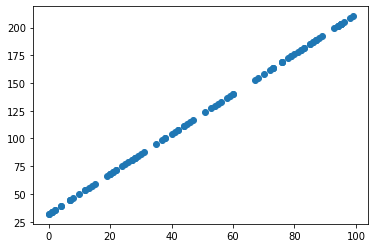

In [5]:
# matplotlib의 pyplot을 이용하여 만들어준 데이터셋을 시각화해봅시다. 
# 두 변수(섭씨온도, 화씨온도)간의 관계를 보여줄 수 있는 산점도그래프(sctter plot)를 그려줍니다.
# x축에는 섭씨온도(C), y축에는 화씨온도(F)로 그려주면, 선형관계를 갖고 있음을 확인할 수 있습니다.
plt.scatter(C, F)

### Gradient Descent

이제 본격적으로 선형 회귀 알고리즘을 학습시켜 보겠습니다. 먼저 앞서 생성한 Feature(섭씨온도,```C```)와 Label(화씨온도, ```F```)을 각각 ```X```,```y```라는 변수에 넣겠습니다.

In [6]:
# 섭씨온도(C)를 입력값 혹은 feature에 해당하는 X값, 
# 화씨온도(F)를 정답지 혹은 label에 해당하는 y값에 저장합니다.
X = C
y = F

이제, 경사 하강법(Gradient Descent)를 사용하여 섭씨온도(C)를 화씨온도(F)로 변환해줄 수 있는 공식을 찾아봅시다. 

공식의 세부내용은 모르지만, 두 변수(```X```, ```y```)가 선형(linear)관계있음을 가정($y = X * w + b$)하여 가중치(weight) ```w```와 편차(bias) ```b```을 정의해줍니다. 그리고, 경사하강법을 이용해 선형회귀를 학습시켜줍니다. 

학습이 완료되면, 얻어진 최적의 가중치(weight, ```w```)와 편차(bias, ```b```)로 섭씨온도를 화씨온도로 변환해주는 공식을 만들어줄 수 있습니다.

학습은 모든 epoch이 끝날 때까지 반복할 수도 있지만, 여기선 오차(error)가 0.1이하가 되면 학습을 종료하도록 하겠습니다.

In [7]:
# 학습을 몇 회 반복할지, 즉 몇 번 for문을 돌릴지 세팅해줍니다. 
num_epoch = 100000
# 1회 학습을 할 때, w와 b를 얼마나 미세하게 조정해줄지 세팅해줍니다.
# 이 값이 작을수록 더욱 미세하게 조정하므로 더 오랜시간이 걸리지만 더 최적의 값을 찾을 수 있습니다.
learning_rate = 0.0003

# np.random.uniform()은 최솟값(low), 최댓값(high), 개수(size)를 입력받습니다.
# 최솟값과 최댓값 사이에서 지정한 개수만큼 랜덤하게 실수(Real Number)를 추출합니다.
# -1 ~ +1 사이의 랜덤으로 한 개를 뽑아 w(가중치)에 지정(초기화)합니다.
# -1 ~ +1 사이의 랜덤으로 한 개를 뽑아 b(편차)에 지정(초기화)합니다.
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

# epoch만큼 반복되는 for문을 선언합니다.
for epoch in range(num_epoch):
    
    # 현재의 w(weight)에 X를 곱하고 b(bias)를 더하여 y_predict 변수에 저장합니다.
    # y_predict는 y를 예측한 값을 뜻합니다.
    y_predict = w * X + b
    
    # 현재 오차를 구하여 error에 저장합니다.
    # 오차는 MAE(Mean Absolute Error)를 사용합니다.
    error = np.abs(y_predict - y).mean()
    
    # 만약 현재 오차가 0.1보다 작다면 for문을 마치고 알고리즘을 끝냅니다.
    # 오차가 일정 이하로 내려가지 못할 경우, for문이 의미없이 반복되는 것을 막기 위한 코드입니다.
    if error < 0.1:
        # break는 for문을 바로 마칩니다.
        break
        
    # w를 learning_rate * ((y_predict - y) * X).mean()으로 갱신합니다.
    w = w - learning_rate * ((y_predict - y) * X).mean()
    # b를 learning_rate * ((y_predict - y)).mean()으로 갱신합니다.
    b = b - learning_rate * (y_predict - y).mean()

    # 10000회 마다 epoch, w, b, error를 print하여 확인합니다. 
    if epoch % 10000 == 0:
        print(f"{epoch:5} w = {w:.6f}, b = {b:.6f}, error = {error:.6f}")
    
# 최종 결과를 확인합니다. 
# epoch, w, b, current_error를 출력합니다.
print("----" * 10)
print(f"{epoch:5} w = {w:.6f}, b = {b:.6f}, error = {error:.6f}")

    0 w = 2.417505, b = -0.470032, error = 148.823996
10000 w = 1.995093, b = 18.291292, error = 6.161479
20000 w = 1.882362, b = 26.212637, error = 2.601173
30000 w = 1.834770, b = 29.556766, error = 1.098129
40000 w = 1.814679, b = 30.968548, error = 0.463594
50000 w = 1.806197, b = 31.564555, error = 0.195714
----------------------------------------
57787 w = 1.803167, b = 31.777497, error = 0.099997


## Predict

선형 회귀의 학습이 끝났으면, 이제 이 머신러닝 알고리즘을 활용하여 변환공식을 완성하고, 주어진 섭씨온도를 화씨온도로 변환(혹은 섭씨온도로 화씨온도를 예측)할 수 있습니다. 

앞서 만들어준 데이터를 그대로 활용하여 주어진 섭씨온도(C)로 화씨온도를 예측해보겠습니다.

In [8]:
# 우리가 알고있는 공식이 아닌, 알고리즘이 찾아준 w(weight)와 b(bias)를 이용하여,
# 주어진 섭씨온도(C)에 해당하는 화씨온도를 계산(예측)하여 y_predict에 저장해줍니다.
y_predict = w * C + b
# y_predict의 첫 5개의 값을 확인합니다.
y_predict[0:5]

array([168.81815142, 129.14848836, 201.27514847, 168.81815142,
       130.95165486])

In [9]:
# 예측한 화씨온도가 잘 예측되었는지 비교해봅시다. 
# 섭씨온도, 화씨온도, 예측한 화씨온도를 한 눈에 비교할 수 있도록 
# pandas의 DataFrame형태로 C, F, y_predict를 저장하고 출력해봅니다.
result = pd.DataFrame({"C": C, "F": F, "F(predict)": y_predict})

# result의 shape를 확인합니다.
print(result.shape)
# result의 결과를 
result.head(10)

(100, 3)


,C,F,F(predict)
0,76,168.8,168.818151
1,54,129.2,129.148488
2,94,201.2,201.275148
3,76,168.8,168.818151
4,55,131.0,130.951655
5,98,208.4,208.487814
6,20,68.0,67.840827
7,21,69.8,69.643994
8,28,82.4,82.266159
9,4,39.2,38.990163


## Visualize

결과가 잘 나왔으면, 예측한 값과 실제값을 비교하여 시각화를 통해 잘 예측이 되었는지 확인할 수 있습니다.

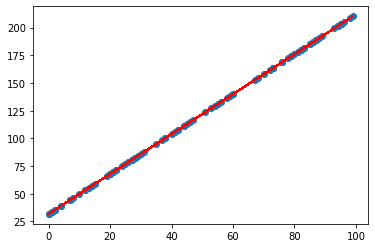

In [10]:
# 두 변수(섭씨온도, 화씨온도)간의 관계를 보여줄 수 있는 산점도그래프(sctter plot)를 그려줍니다.
plt.scatter(C, F)

# 예측한 화씨온도(y_predict)와 주어진 섭씨온도(C)간의 관계를 직선그래프로 확인해봅니다.
# 기존의 C, F와의 관계처럼 선형관계를 잘 예측한 것을 확인할 수 있습니다.
plt.plot(C, y_predict, c='r')